In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import numpy as np
pd.set_option("display.max_columns",100)

In [3]:
df2=pd.read_csv("ttest.csv")

In [128]:
df1=pd.read_csv("ttrain.csv")

In [5]:
df1.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
df1.shape

(891, 12)

In [8]:
df2.shape

(418, 11)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [11]:
df=df1.append(df2)

In [12]:
#EDA

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1046 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1308 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [14]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [15]:
df.Pclass.value_counts()

3    709
1    323
2    277
Name: Pclass, dtype: int64

In [16]:
df.Pclass.value_counts(normalize=True)

3    0.541635
1    0.246753
2    0.211612
Name: Pclass, dtype: float64

In [17]:
df.Name.value_counts()

Kelly, Mr. James                                   2
Connolly, Miss. Kate                               2
Allison, Mr. Hudson Joshua Creighton               1
Reynolds, Mr. Harold J                             1
Pears, Mrs. Thomas (Edith Wearne)                  1
                                                  ..
Head, Mr. Christopher                              1
Risien, Mrs. Samuel (Emma)                         1
Cook, Mr. Jacob                                    1
Richards, Master. George Sibley                    1
Minahan, Mrs. William Edward (Lillian E Thorpe)    1
Name: Name, Length: 1307, dtype: int64

In [18]:
df["Sex"].value_counts()

male      843
female    466
Name: Sex, dtype: int64

In [19]:
df["Sex"].value_counts(normalize=True)

male      0.644003
female    0.355997
Name: Sex, dtype: float64

In [20]:
df["Age"].value_counts()

24.00    47
22.00    43
21.00    41
30.00    40
18.00    39
         ..
76.00     1
22.50     1
74.00     1
80.00     1
0.67      1
Name: Age, Length: 98, dtype: int64

In [21]:
df["Age"].value_counts().max(),df["Age"].value_counts().min()

(47, 1)

In [22]:
df["Age"].max(),df["Age"].min()

(80.0, 0.17)

In [23]:
df["SibSp"].value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [24]:
df["Parch"].value_counts()

0    1002
1     170
2     113
3       8
5       6
4       6
9       2
6       2
Name: Parch, dtype: int64

In [25]:
df["Fare"].max(),df["Fare"].min()

(512.3292, 0.0)

In [26]:
df["Cabin"].value_counts()

C23 C25 C27        6
G6                 5
B57 B59 B63 B66    5
F2                 4
D                  4
                  ..
C51                1
C70                1
C104               1
C128               1
B94                1
Name: Cabin, Length: 186, dtype: int64

In [27]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [28]:
df["Title"]=df["Name"].str.extract("([A-Za-z]+)\.",expand=False)

In [29]:
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [30]:
df["Title"].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Dr            8
Rev           8
Col           4
Major         2
Mlle          2
Ms            2
Mme           1
Sir           1
Lady          1
Countess      1
Capt          1
Dona          1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [31]:
df["Title"]=df["Title"].replace(["Mlle","Ms"],"Miss")
df["Title"]=df["Title"].replace(["Dona","Countess","Mme","Lady"],"Mrs")
df["Title"]=df["Title"].replace(["Rev","Dr","Col","Major","Don","Sir","Capt","Jonkheer"],"Mr")

In [32]:
df["Title"].value_counts()

Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

In [33]:
df.groupby("Sex")["Age"].mean()

Sex
female    28.687088
male      30.585228
Name: Age, dtype: float64

In [34]:
df.groupby("Sex")["Survived"].value_counts()

Sex     Survived
female  1.0         233
        0.0          81
male    0.0         468
        1.0         109
Name: Survived, dtype: int64

In [35]:
df.groupby("Sex")["Survived"].value_counts(normalize=True)

Sex     Survived
female  1.0         0.742038
        0.0         0.257962
male    0.0         0.811092
        1.0         0.188908
Name: Survived, dtype: float64

In [36]:
df.groupby("Sex")["Age"].median()

Sex
female    27.0
male      28.0
Name: Age, dtype: float64

In [37]:
##Filling the gaps

In [38]:
df.isnull().sum().sort_values(ascending=False)

Cabin          1014
Survived        418
Age             263
Embarked          2
Fare              1
Title             0
Ticket            0
Parch             0
SibSp             0
Sex               0
Name              0
Pclass            0
PassengerId       0
dtype: int64

In [39]:
del df["Cabin"]

In [40]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [41]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.038354,0.028814,-0.055224,0.008942,0.031428
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.038354,-0.338481,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.077221,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,-0.035322,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.081629,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,0.257307,-0.558629,0.178740,0.160238,0.221539,1.000000


In [42]:
df.groupby("Pclass")["Age"].mean()

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [43]:
df.groupby("Pclass")["Age"].median()

Pclass
1    39.0
2    29.0
3    24.0
Name: Age, dtype: float64

In [44]:
df["Age"].fillna(df.groupby("Pclass")["Age"].transform("median"),inplace=True)

In [45]:
df.isnull().sum().sort_values(ascending=False)

Survived       418
Embarked         2
Fare             1
Title            0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [46]:
df["Embarked"].value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [47]:
df["Embarked"].fillna("S",inplace=True)

In [48]:
df.groupby("Pclass")["Fare"].median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [49]:
df.groupby("Pclass")["Fare"].mean()

Pclass
1    87.508992
2    21.179196
3    13.302889
Name: Fare, dtype: float64

In [53]:
df["Fare"].fillna(df.groupby("Pclass")["Fare"].transform("median"),inplace=True)

In [54]:
df.isnull().sum().sort_values(ascending=False)

Survived       418
Title            0
Embarked         0
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [55]:
df["Family"]=df["SibSp"]+df["Parch"]+1

In [56]:
df.sample()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Family
20,21,0.0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0,S,Mr,1


In [62]:
df=df.drop(["PassengerId","Ticket"],axis=1)

In [63]:
df.sample()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
803,1.0,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,8.5167,C,Master,2


In [ ]:
#DATA VISUALIZATION

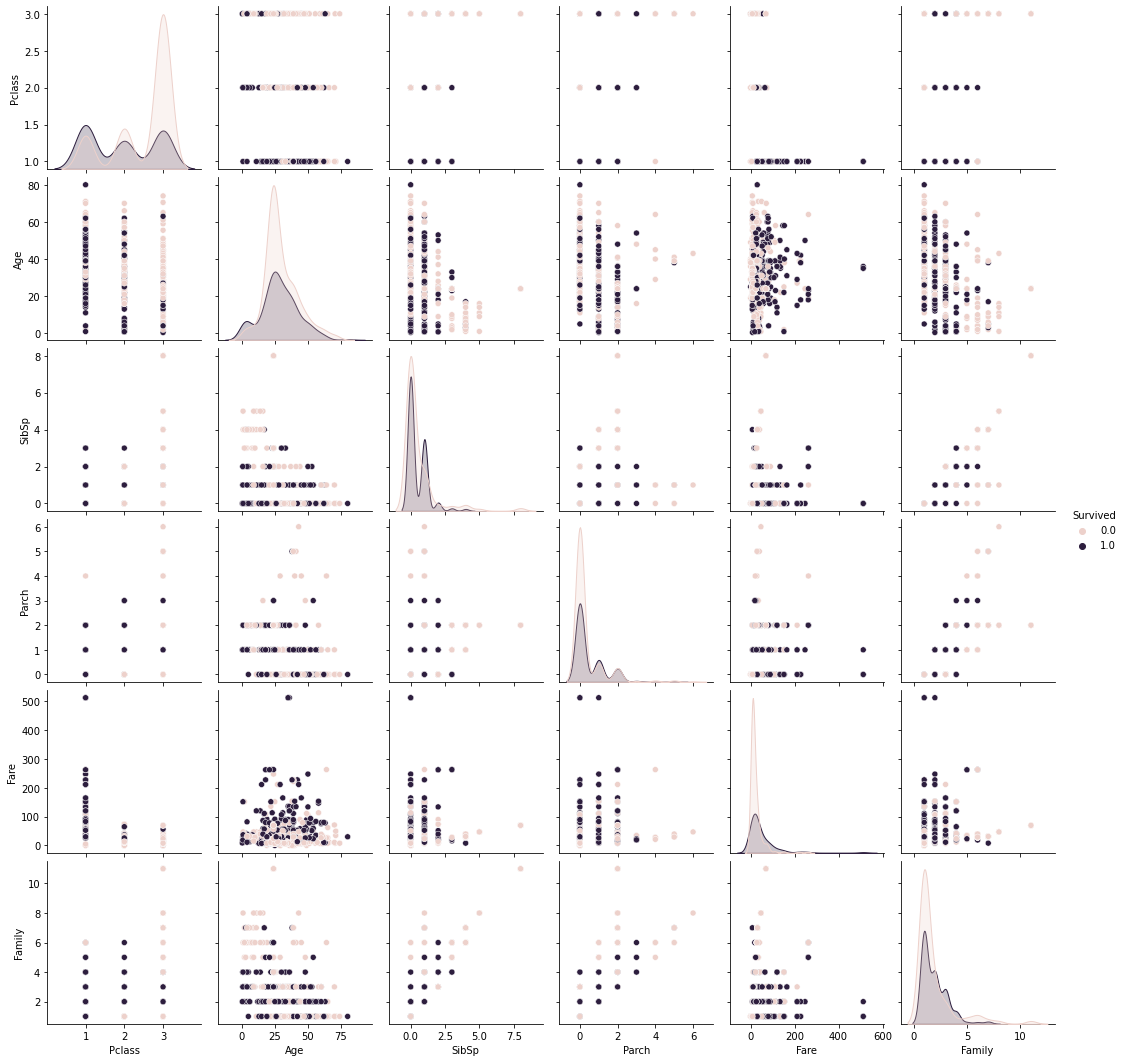

In [65]:
sns.pairplot(df,hue="Survived");

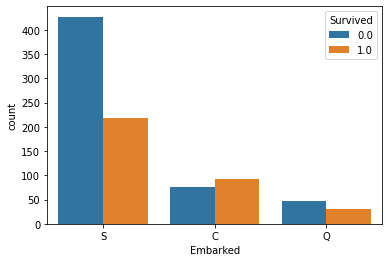

In [66]:
sns.countplot(x="Embarked",hue="Survived",data=df);

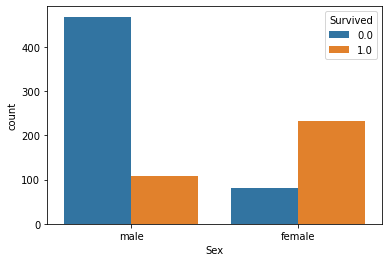

In [68]:
sns.countplot(x="Sex",hue="Survived",data=df);

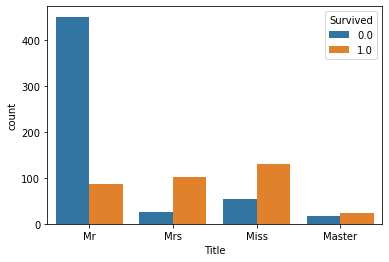

In [70]:
sns.countplot(x="Title",hue="Survived",data=df);

In [78]:
df["Title"].value_counts()


Mr        783
Miss      264
Mrs       201
Master     61
Name: Title, dtype: int64

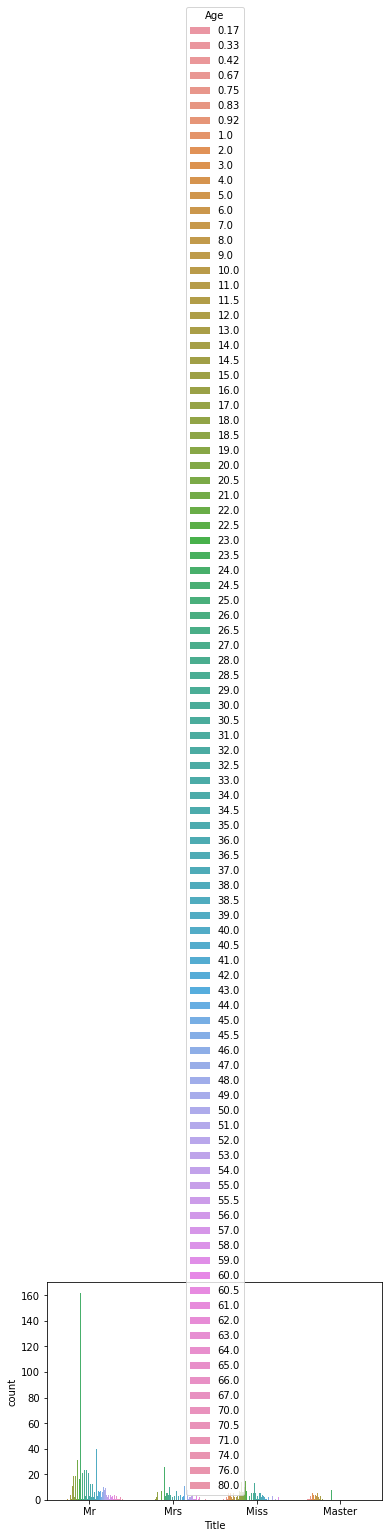

In [79]:
sns.countplot(x="Title",hue="Age",data=df);

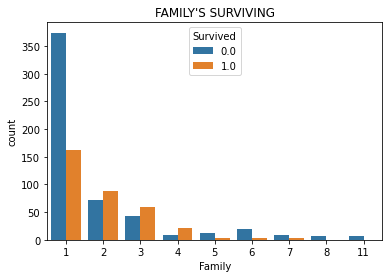

In [89]:
sns.countplot(x="Family",hue="Survived",data=df);
plt.title("FAMILY'S SURVIVING");

In [88]:
df.groupby("Family")["Survived"].value_counts(normalize=True)

Family  Survived
1       0.0         0.696462
        1.0         0.303538
2       1.0         0.552795
        0.0         0.447205
3       1.0         0.578431
        0.0         0.421569
4       1.0         0.724138
        0.0         0.275862
5       0.0         0.800000
        1.0         0.200000
6       0.0         0.863636
        1.0         0.136364
7       0.0         0.666667
        1.0         0.333333
8       0.0         1.000000
11      0.0         1.000000
Name: Survived, dtype: float64

C:\Users\ASUS\ANACONDA\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


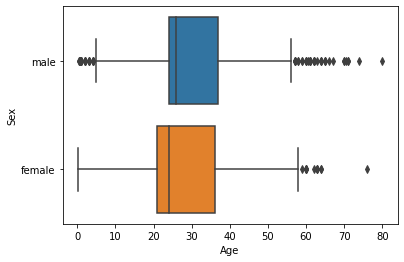

In [93]:
sns.boxplot("Age","Sex",data=df);

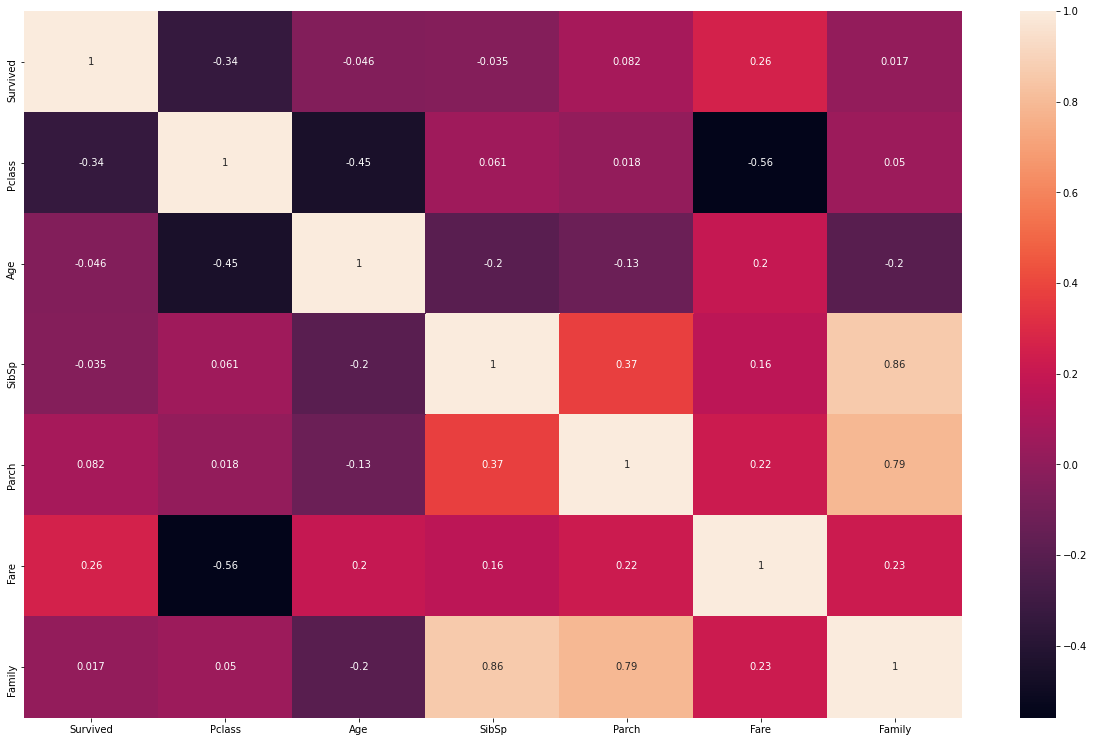

In [95]:
plt.figure(figsize=(21,13))
sns.heatmap(df.corr(),annot=True);

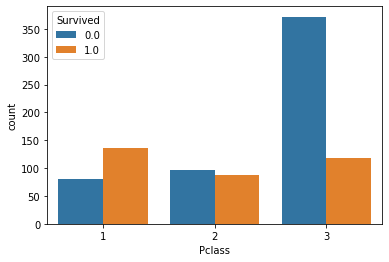

In [97]:
sns.countplot(x="Pclass",hue="Survived",data=df);

In [98]:
del df["Name"]

In [99]:
df.sample()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Family
257,NaN,3,male,28.0,0,0,8.05,S,Mr,1


In [100]:
df_dummies=pd.get_dummies(df,drop_first=True)

In [101]:
df_dummies

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,NaN,3,24.0,0,0,8.0500,1,1,0,1,0,1,0
414,NaN,1,39.0,0,0,108.9000,1,0,0,0,0,0,1
415,NaN,3,38.5,0,0,7.2500,1,1,0,1,0,1,0
416,NaN,3,24.0,0,0,8.0500,1,1,0,1,0,1,0


In [106]:
df_dummies.to_pickle("titanic_available_data.pickle")

In [107]:
df_dummies.to_csv("titanic_available_data.csv")

In [129]:
df3=pd.read_csv("titanic_available_data.csv")

In [130]:
df3.head()

,Unnamed: 0,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0


In [131]:
df3.shape

(1309, 14)

In [132]:
del df3["Unnamed: 0"]

In [133]:
df3.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0


In [188]:
df4=df3[:891]

In [189]:
df4

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.0,0,0,13.0000,1,1,0,1,0,1,0
887,1.0,1,19.0,0,0,30.0000,1,0,0,1,1,0,0
888,0.0,3,24.0,1,2,23.4500,4,0,0,1,1,0,0
889,1.0,1,26.0,0,0,30.0000,1,1,0,0,0,1,0


In [113]:
from pycaret.regression import*

In [190]:
exp_name=setup(data=df4,target="Survived")

,Description,Value
0,session_id,8358
1,Target,Survived
2,Original Data,"(891, 13)"
3,Missing Values,False
4,Numeric Features,2
5,Categorical Features,10
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(623, 31)"


In [191]:
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,0.2497,0.1274,0.3544,0.4463,0.0000,0.3285,0.0620
ridge,Ridge Regression,0.2628,0.1284,0.3563,0.4403,0.0000,0.3479,0.0140
lr,Linear Regression,0.2609,0.1288,0.3567,0.4389,0.0000,0.3462,5.6880
br,Bayesian Ridge,0.2674,0.1287,0.3569,0.4389,0.0000,0.3537,0.0200
rf,Random Forest Regressor,0.2302,0.1365,0.3645,0.4062,0.0000,0.2911,0.2010
omp,Orthogonal Matching Pursuit,0.2786,0.1402,0.3727,0.3896,0.0000,0.3644,0.0170
ada,AdaBoost Regressor,0.3089,0.1410,0.3745,0.3847,0.0000,0.3583,0.0320
xgboost,Extreme Gradient Boosting,0.2417,0.1493,0.3801,0.3516,0.0000,0.3129,0.6420
et,Extra Trees Regressor,0.2265,0.1634,0.3989,0.2899,0.0000,0.2976,0.1780
huber,Huber Regressor,0.2010,0.1677,0.4065,0.2699,0.0000,0.3120,0.0540


In [192]:
from pycaret.classification import*


In [193]:
clf=setup(data=df4,target="Survived",session_id=1229,normalize=True)

,Description,Value
0,session_id,1229
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0.0: 0, 1.0: 1"
4,Original Data,"(891, 13)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,10
8,Ordinal Features,False
9,High Cardinality Features,False


In [194]:
compare_models(sort="AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.8282,0.8788,0.7186,0.7864,0.7479,0.6185,0.6224,0.1040
lightgbm,Light Gradient Boosting Machine,0.8218,0.8770,0.7229,0.7707,0.7444,0.6080,0.6101,0.3310
lda,Linear Discriminant Analysis,0.8168,0.8763,0.7310,0.7562,0.7399,0.5990,0.6023,0.0290
lr,Logistic Regression,0.8249,0.8742,0.7271,0.7816,0.7480,0.6147,0.6203,1.1060
xgboost,Extreme Gradient Boosting,0.8202,0.8667,0.7093,0.7727,0.7376,0.6015,0.6044,0.3650
ada,Ada Boost Classifier,0.8201,0.8614,0.7589,0.7458,0.7496,0.6095,0.6122,0.1080
knn,K Neighbors Classifier,0.8184,0.8555,0.7089,0.7710,0.7362,0.5983,0.6017,0.0290
rf,Random Forest Classifier,0.8008,0.8534,0.6923,0.7502,0.7152,0.5629,0.5683,0.2080
et,Extra Trees Classifier,0.7992,0.8300,0.6962,0.7426,0.7142,0.5601,0.5647,0.1870
nb,Naive Bayes,0.3934,0.7946,0.9646,0.3688,0.5335,0.0276,0.0721,0.0170


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=1229, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [195]:
gbc=create_model("gbc",fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.8848,0.6522,0.8824,0.7500,0.6375,0.6531
1,0.7937,0.8386,0.6957,0.7273,0.7111,0.5507,0.5511
2,0.8730,0.9587,0.7826,0.8571,0.8182,0.7209,0.7227
3,0.8226,0.9158,0.7826,0.7500,0.7660,0.6232,0.6236
4,0.8226,0.8727,0.7273,0.7619,0.7442,0.6085,0.6089
5,0.8387,0.8903,0.7273,0.8000,0.7619,0.6404,0.6420
6,0.8710,0.9193,0.8636,0.7917,0.8261,0.7238,0.7256
7,0.8387,0.8432,0.7727,0.7727,0.7727,0.6477,0.6477
8,0.8387,0.8886,0.6818,0.8333,0.7500,0.6327,0.6396
9,0.7419,0.7761,0.5000,0.6875,0.5789,0.3995,0.4100


In [ ]:
##Verileri hiç oynanmamış haliyle pycaret algoritmasına veriyorum

In [196]:
clf=setup(data=df1,target="Survived",session_id=1229,normalize=True)

,Description,Value
0,session_id,1229
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(891, 11)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,7
8,Ordinal Features,False
9,High Cardinality Features,False


In [197]:
compare_models(sort="AUC")

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8184,0.8728,0.6727,0.7910,0.7240,0.5906,0.5970,0.3090
lr,Logistic Regression,0.8184,0.8720,0.7132,0.7696,0.7368,0.5988,0.6030,0.0890
et,Extra Trees Classifier,0.8361,0.8711,0.6909,0.8296,0.7495,0.6298,0.6388,0.3380
gbc,Gradient Boosting Classifier,0.8233,0.8695,0.6328,0.8380,0.7178,0.5934,0.6078,0.4180
ada,Ada Boost Classifier,0.8200,0.8622,0.6721,0.8108,0.7244,0.5936,0.6063,0.2090
lightgbm,Light Gradient Boosting Machine,0.8185,0.8613,0.6868,0.7830,0.7301,0.5945,0.5987,0.4420
xgboost,Extreme Gradient Boosting,0.8073,0.8472,0.6915,0.7566,0.7198,0.5738,0.5776,1.6960
knn,K Neighbors Classifier,0.7767,0.8321,0.6283,0.7138,0.6654,0.4996,0.5039,0.1100
dt,Decision Tree Classifier,0.8104,0.7909,0.7132,0.7503,0.7290,0.5837,0.5861,0.0460
lda,Linear Discriminant Analysis,0.7350,0.7253,0.5887,0.6478,0.6143,0.4137,0.4165,0.2370


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1229, verbose=0,
                       warm_start=False)

In [199]:


rf=create_model("rf",fold=10)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9048,0.9424,0.7826,0.9474,0.8571,0.7867,0.7948
1,0.7937,0.8554,0.6957,0.7273,0.7111,0.5507,0.5511
2,0.8889,0.9511,0.7826,0.9000,0.8372,0.7535,0.7577
3,0.8226,0.8679,0.7391,0.7727,0.7556,0.6164,0.6168
4,0.8065,0.8812,0.5909,0.8125,0.6842,0.5496,0.5641
5,0.7742,0.8068,0.6364,0.7000,0.6667,0.4965,0.4978
6,0.8226,0.9239,0.7273,0.7619,0.7442,0.6085,0.6089
7,0.8226,0.8392,0.7273,0.7619,0.7442,0.6085,0.6089
8,0.8065,0.8881,0.5909,0.8125,0.6842,0.5496,0.5641
9,0.7419,0.7716,0.4545,0.7143,0.5556,0.3861,0.4057


In [ ]:
##DEEP LEARNING

In [201]:
import pandas as pd 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [203]:
df4

,Survived,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,0.0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1.0,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,1.0,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1.0,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,0.0,3,35.0,0,0,8.0500,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0.0,2,27.0,0,0,13.0000,1,1,0,1,0,1,0
887,1.0,1,19.0,0,0,30.0000,1,0,0,1,1,0,0
888,0.0,3,24.0,1,2,23.4500,4,0,0,1,1,0,0
889,1.0,1,26.0,0,0,30.0000,1,1,0,0,0,1,0


In [204]:
y=df4[["Survived"]]

In [205]:
x=df4.drop(["Survived"],axis=1)

In [207]:
y

,Survived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0
...,...
886,0.0
887,1.0
888,0.0
889,1.0


In [208]:
x

,Pclass,Age,SibSp,Parch,Fare,Family,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs
0,3,22.0,1,0,7.2500,2,1,0,1,0,1,0
1,1,38.0,1,0,71.2833,2,0,0,0,0,0,1
2,3,26.0,0,0,7.9250,1,0,0,1,1,0,0
3,1,35.0,1,0,53.1000,2,0,0,1,0,0,1
4,3,35.0,0,0,8.0500,1,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,27.0,0,0,13.0000,1,1,0,1,0,1,0
887,1,19.0,0,0,30.0000,1,0,0,1,1,0,0
888,3,24.0,1,2,23.4500,4,0,0,1,1,0,0
889,1,26.0,0,0,30.0000,1,1,0,0,0,1,0


In [209]:
model=Sequential()
model.add(Dense(12,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(x,y,epochs=150,batch_size=10,verbose=1 )
model.summary()

Epoch 1/150
90/90 [==============================] - 3s 3ms/step - loss: 0.7706 - accuracy: 0.6588
Epoch 2/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6334 - accuracy: 0.6958
Epoch 3/150
90/90 [==============================] - 0s 2ms/step - loss: 0.6049 - accuracy: 0.7082
Epoch 4/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5949 - accuracy: 0.7071
Epoch 5/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5860 - accuracy: 0.7160
Epoch 6/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5800 - accuracy: 0.7160
Epoch 7/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5743 - accuracy: 0.7217
Epoch 8/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5607 - accuracy: 0.7228
Epoch 9/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5536 - accuracy: 0.7262
Epoch 10/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5380 - accuracy: 0.7363
Epoch 11/

In [210]:
scores=model.evaluate(x,y)

28/28 [==============================] - 0s 1ms/step - loss: 0.3817 - accuracy: 0.8429


In [213]:
print('%s:%.2f%%' % (model.metrics_names[1],scores[1]*100))

accuracy:84.29%


In [214]:
##OPTIMIZATION
#katman sayısını 2 ve nöron sayısını arttıracağız

In [215]:
model=Sequential()
model.add(Dense(81,activation="relu"))
model.add(Dense(49,activation="relu"))
model.add(Dense(27,activation="relu"))
model.add(Dense(9,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(x,y,epochs=150,batch_size=10,verbose=1 )
model.summary()

Epoch 1/150
90/90 [==============================] - 1s 2ms/step - loss: 0.6603 - accuracy: 0.6712
Epoch 2/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5670 - accuracy: 0.6958
Epoch 3/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5285 - accuracy: 0.7295
Epoch 4/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5229 - accuracy: 0.7419
Epoch 5/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5025 - accuracy: 0.7598
Epoch 6/150
90/90 [==============================] - 0s 2ms/step - loss: 0.5097 - accuracy: 0.7598
Epoch 7/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4978 - accuracy: 0.7778
Epoch 8/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4915 - accuracy: 0.7800
Epoch 9/150
90/90 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.7901
Epoch 10/150
90/90 [==============================] - 0s 3ms/step - loss: 0.4808 - accuracy: 0.7868
Epoch 11/

In [216]:
scores=model.evaluate(x,y)
print('%s:%.2f%%' % (model.metrics_names[1],scores[1]*100))

28/28 [==============================] - 0s 2ms/step - loss: 0.3185 - accuracy: 0.8597
accuracy:85.97%


In [217]:
#epochs sayısını arttıracağız.

In [218]:
model=Sequential()
model.add(Dense(81,activation="relu"))
model.add(Dense(49,activation="relu"))
model.add(Dense(27,activation="relu"))
model.add(Dense(9,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(x,y,epochs=180,batch_size=10,verbose=1 )
model.summary()

Epoch 1/180
90/90 [==============================] - 1s 2ms/step - loss: 0.6163 - accuracy: 0.6801
Epoch 2/180
90/90 [==============================] - 0s 2ms/step - loss: 0.5766 - accuracy: 0.7093
Epoch 3/180
90/90 [==============================] - 0s 2ms/step - loss: 0.5352 - accuracy: 0.7295
Epoch 4/180
90/90 [==============================] - 0s 2ms/step - loss: 0.5191 - accuracy: 0.7553
Epoch 5/180
90/90 [==============================] - 0s 2ms/step - loss: 0.4928 - accuracy: 0.7789
Epoch 6/180
90/90 [==============================] - 0s 2ms/step - loss: 0.4965 - accuracy: 0.7935
Epoch 7/180
90/90 [==============================] - 0s 3ms/step - loss: 0.4835 - accuracy: 0.7924
Epoch 8/180
90/90 [==============================] - 0s 2ms/step - loss: 0.4733 - accuracy: 0.7946
Epoch 9/180
90/90 [==============================] - 0s 2ms/step - loss: 0.4574 - accuracy: 0.8036
Epoch 10/180
90/90 [==============================] - 0s 2ms/step - loss: 0.4774 - accuracy: 0.7969
Epoch 11/

Epoch 162/180
90/90 [==============================] - 0s 2ms/step - loss: 0.3053 - accuracy: 0.8777: 0s - loss: 0.2652 - accuracy: 
Epoch 163/180
90/90 [==============================] - 0s 2ms/step - loss: 0.3130 - accuracy: 0.8664
Epoch 164/180
90/90 [==============================] - 0s 2ms/step - loss: 0.2994 - accuracy: 0.8754
Epoch 165/180
90/90 [==============================] - 0s 2ms/step - loss: 0.3209 - accuracy: 0.8642
Epoch 166/180
90/90 [==============================] - 0s 2ms/step - loss: 0.3077 - accuracy: 0.8664
Epoch 167/180
90/90 [==============================] - 0s 2ms/step - loss: 0.3046 - accuracy: 0.8687
Epoch 168/180
90/90 [==============================] - 0s 2ms/step - loss: 0.3082 - accuracy: 0.8709
Epoch 169/180
90/90 [==============================] - 0s 2ms/step - loss: 0.2970 - accuracy: 0.8754
Epoch 170/180
90/90 [==============================] - 0s 2ms/step - loss: 0.2897 - accuracy: 0.8855
Epoch 171/180
90/90 [==============================] - 0s 2

In [219]:
scores=model.evaluate(x,y)
print('%s:%.2f%%' % (model.metrics_names[1],scores[1]*100))

28/28 [==============================] - 0s 1ms/step - loss: 0.3094 - accuracy: 0.8777
accuracy:87.77%


In [220]:
#Bir kez daha epochs sayısını arttıracağız

In [222]:
model.fit(x,y,epochs=250,batch_size=10,verbose=1 )
model.summary()

Epoch 1/250
90/90 [==============================] - 0s 2ms/step - loss: 0.2358 - accuracy: 0.8878
Epoch 2/250
90/90 [==============================] - 0s 2ms/step - loss: 0.2384 - accuracy: 0.8990
Epoch 3/250
90/90 [==============================] - 0s 2ms/step - loss: 0.2483 - accuracy: 0.8923: 0s - loss: 0.2433 - accuracy: 0.89
Epoch 4/250
90/90 [==============================] - 0s 2ms/step - loss: 0.2269 - accuracy: 0.9012
Epoch 5/250
90/90 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 0.9125
Epoch 6/250
90/90 [==============================] - 0s 2ms/step - loss: 0.2146 - accuracy: 0.9091
Epoch 7/250
90/90 [==============================] - 0s 2ms/step - loss: 0.2614 - accuracy: 0.8911
Epoch 8/250
90/90 [==============================] - 0s 2ms/step - loss: 0.2377 - accuracy: 0.8934
Epoch 9/250
90/90 [==============================] - 0s 2ms/step - loss: 0.2305 - accuracy: 0.9024
Epoch 10/250
90/90 [==============================] - 0s 2ms/step - loss:

90/90 [==============================] - 0s 2ms/step - loss: 0.2098 - accuracy: 0.9147
Epoch 163/250
90/90 [==============================] - 0s 2ms/step - loss: 0.1930 - accuracy: 0.9181
Epoch 164/250
90/90 [==============================] - 0s 2ms/step - loss: 0.2100 - accuracy: 0.9046
Epoch 165/250
90/90 [==============================] - 0s 2ms/step - loss: 0.2219 - accuracy: 0.9046
Epoch 166/250
90/90 [==============================] - 0s 2ms/step - loss: 0.2206 - accuracy: 0.9113
Epoch 167/250
90/90 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.9035
Epoch 168/250
90/90 [==============================] - 0s 2ms/step - loss: 0.2978 - accuracy: 0.8799
Epoch 169/250
90/90 [==============================] - 0s 2ms/step - loss: 0.2401 - accuracy: 0.8990
Epoch 170/250
90/90 [==============================] - 0s 2ms/step - loss: 0.2005 - accuracy: 0.9136: 0s - loss: 0.2130 - accuracy: 0.
Epoch 171/250
90/90 [==============================] - 0s 2ms/step - lo

In [223]:
scores=model.evaluate(x,y)
print('%s:%.2f%%' % (model.metrics_names[1],scores[1]*100))

28/28 [==============================] - 0s 1ms/step - loss: 0.1905 - accuracy: 0.9214
accuracy:92.14%


In [ ]:
#The best prediction
#epochs u 300 e çıkarttık 

In [228]:
history=model.fit(x,y,validation_split=0.20,epochs=300,batch_size=10,verbose=2)
model.summary()


Epoch 1/300
72/72 - 0s - loss: 0.1969 - accuracy: 0.9129 - val_loss: 0.1857 - val_accuracy: 0.9274
Epoch 2/300
72/72 - 0s - loss: 0.1936 - accuracy: 0.9143 - val_loss: 0.1873 - val_accuracy: 0.9162
Epoch 3/300
72/72 - 0s - loss: 0.1981 - accuracy: 0.9087 - val_loss: 0.1706 - val_accuracy: 0.9385
Epoch 4/300
72/72 - 0s - loss: 0.1900 - accuracy: 0.9242 - val_loss: 0.1840 - val_accuracy: 0.9274
Epoch 5/300
72/72 - 0s - loss: 0.1938 - accuracy: 0.9171 - val_loss: 0.1824 - val_accuracy: 0.9218
Epoch 6/300
72/72 - 0s - loss: 0.1927 - accuracy: 0.9171 - val_loss: 0.1725 - val_accuracy: 0.9274
Epoch 7/300
72/72 - 0s - loss: 0.1960 - accuracy: 0.9213 - val_loss: 0.1941 - val_accuracy: 0.9218
Epoch 8/300
72/72 - 0s - loss: 0.1997 - accuracy: 0.9171 - val_loss: 0.1951 - val_accuracy: 0.9274
Epoch 9/300
72/72 - 0s - loss: 0.1933 - accuracy: 0.9213 - val_loss: 0.2011 - val_accuracy: 0.9218
Epoch 10/300
72/72 - 0s - loss: 0.2458 - accuracy: 0.8933 - val_loss: 0.3185 - val_accuracy: 0.8771
Epoch 11/

72/72 - 0s - loss: 0.1682 - accuracy: 0.9284 - val_loss: 0.3065 - val_accuracy: 0.8939
Epoch 84/300
72/72 - 0s - loss: 0.1746 - accuracy: 0.9256 - val_loss: 0.3081 - val_accuracy: 0.8939
Epoch 85/300
72/72 - 0s - loss: 0.1704 - accuracy: 0.9270 - val_loss: 0.3046 - val_accuracy: 0.8883
Epoch 86/300
72/72 - 0s - loss: 0.1772 - accuracy: 0.9213 - val_loss: 0.3395 - val_accuracy: 0.8939
Epoch 87/300
72/72 - 0s - loss: 0.1871 - accuracy: 0.9228 - val_loss: 0.2967 - val_accuracy: 0.8994
Epoch 88/300
72/72 - 0s - loss: 0.1973 - accuracy: 0.9171 - val_loss: 0.3022 - val_accuracy: 0.8771
Epoch 89/300
72/72 - 0s - loss: 0.1868 - accuracy: 0.9256 - val_loss: 0.3149 - val_accuracy: 0.8827
Epoch 90/300
72/72 - 0s - loss: 0.2616 - accuracy: 0.8989 - val_loss: 0.3103 - val_accuracy: 0.8939
Epoch 91/300
72/72 - 0s - loss: 0.2184 - accuracy: 0.9059 - val_loss: 0.2870 - val_accuracy: 0.9106
Epoch 92/300
72/72 - 0s - loss: 0.1928 - accuracy: 0.9256 - val_loss: 0.2808 - val_accuracy: 0.8939
Epoch 93/300


Epoch 165/300
72/72 - 0s - loss: 0.1899 - accuracy: 0.9199 - val_loss: 0.3587 - val_accuracy: 0.8827
Epoch 166/300
72/72 - 0s - loss: 0.1920 - accuracy: 0.9228 - val_loss: 0.3364 - val_accuracy: 0.9106
Epoch 167/300
72/72 - 0s - loss: 0.1766 - accuracy: 0.9340 - val_loss: 0.3882 - val_accuracy: 0.8939
Epoch 168/300
72/72 - 0s - loss: 0.1777 - accuracy: 0.9270 - val_loss: 0.3403 - val_accuracy: 0.9050
Epoch 169/300
72/72 - 0s - loss: 0.1831 - accuracy: 0.9185 - val_loss: 0.3560 - val_accuracy: 0.8939
Epoch 170/300
72/72 - 0s - loss: 0.1740 - accuracy: 0.9284 - val_loss: 0.4021 - val_accuracy: 0.8883
Epoch 171/300
72/72 - 0s - loss: 0.1713 - accuracy: 0.9228 - val_loss: 0.3096 - val_accuracy: 0.9050
Epoch 172/300
72/72 - 0s - loss: 0.1691 - accuracy: 0.9326 - val_loss: 0.3703 - val_accuracy: 0.9050
Epoch 173/300
72/72 - 0s - loss: 0.1694 - accuracy: 0.9298 - val_loss: 0.3931 - val_accuracy: 0.8827
Epoch 174/300
72/72 - 0s - loss: 0.1675 - accuracy: 0.9270 - val_loss: 0.4171 - val_accurac

72/72 - 0s - loss: 0.2040 - accuracy: 0.9199 - val_loss: 0.4230 - val_accuracy: 0.8771
Epoch 247/300
72/72 - 0s - loss: 0.1631 - accuracy: 0.9326 - val_loss: 0.4387 - val_accuracy: 0.8883
Epoch 248/300
72/72 - 0s - loss: 0.1630 - accuracy: 0.9326 - val_loss: 0.3905 - val_accuracy: 0.8883
Epoch 249/300
72/72 - 0s - loss: 0.1597 - accuracy: 0.9340 - val_loss: 0.3996 - val_accuracy: 0.8883
Epoch 250/300
72/72 - 0s - loss: 0.1535 - accuracy: 0.9382 - val_loss: 0.4521 - val_accuracy: 0.8939
Epoch 251/300
72/72 - 0s - loss: 0.1513 - accuracy: 0.9382 - val_loss: 0.4548 - val_accuracy: 0.8827
Epoch 252/300
72/72 - 0s - loss: 0.1663 - accuracy: 0.9270 - val_loss: 0.4480 - val_accuracy: 0.8883
Epoch 253/300
72/72 - 0s - loss: 0.1577 - accuracy: 0.9368 - val_loss: 0.5233 - val_accuracy: 0.8939
Epoch 254/300
72/72 - 0s - loss: 0.1706 - accuracy: 0.9270 - val_loss: 0.4264 - val_accuracy: 0.8883
Epoch 255/300
72/72 - 0s - loss: 0.1584 - accuracy: 0.9396 - val_loss: 0.4411 - val_accuracy: 0.8939
Epoc

In [230]:
scores=model.evaluate(x,y)
print('%s:%.2f%%' % (model.metrics_names[1],scores[1]*100))

28/28 [==============================] - 0s 2ms/step - loss: 0.2074 - accuracy: 0.9259
accuracy:92.59%


In [231]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


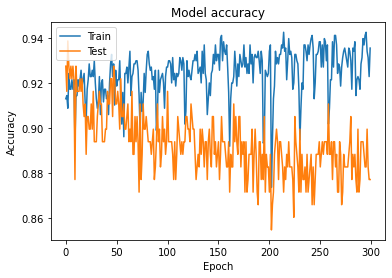

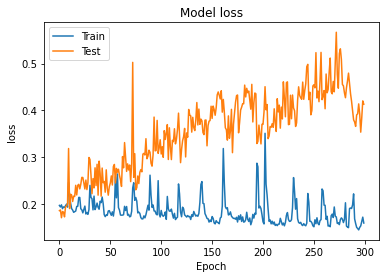

In [233]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.show();

In [234]:
#Drop-out fonksiyonuyla sütunlara karşı daha objektif davranılmasını sağlayarak optimize edeceğiz

In [239]:
#import tensorflow as tf

In [245]:
#model=Sequential()
#model.add(Dense(81,activation="relu"))
#tf.keras.layers.Dropout(0.25)#1. layerın %25 ini attı
#model.add(Dense(49,activation="relu"))
#model.add(Dense(27,activation="relu"))
#tf.keras.layers.Dropout(0.5)#3. layerın %50 ini attı
#model.add(Dense(9,activation="relu"))
#model.add(Dense(1,activation="sigmoid"))

#model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
#model.fit(x,y,epochs=300,batch_size=10,verbose=1 )
#model.summary()

Epoch 1/300
90/90 [==============================] - ETA: 0s - loss: 0.7358 - accuracy: 0.65 - 1s 2ms/step - loss: 0.7132 - accuracy: 0.6566
Epoch 2/300
90/90 [==============================] - 0s 2ms/step - loss: 0.5757 - accuracy: 0.7026: 0s - loss: 0.5660 - accuracy: 0.
Epoch 3/300
90/90 [==============================] - 0s 2ms/step - loss: 0.5212 - accuracy: 0.7441
Epoch 4/300
90/90 [==============================] - 0s 2ms/step - loss: 0.5434 - accuracy: 0.7407
Epoch 5/300
90/90 [==============================] - 0s 2ms/step - loss: 0.5105 - accuracy: 0.7767
Epoch 6/300
90/90 [==============================] - 0s 2ms/step - loss: 0.4912 - accuracy: 0.7856
Epoch 7/300
90/90 [==============================] - 0s 2ms/step - loss: 0.4955 - accuracy: 0.7710
Epoch 8/300
90/90 [==============================] - 0s 3ms/step - loss: 0.4779 - accuracy: 0.7879
Epoch 9/300
90/90 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7856
Epoch 10/300
90/90 [=============

Epoch 163/300
90/90 [==============================] - 0s 2ms/step - loss: 0.2925 - accuracy: 0.8754
Epoch 164/300
90/90 [==============================] - 0s 2ms/step - loss: 0.2918 - accuracy: 0.8754
Epoch 165/300
90/90 [==============================] - 0s 2ms/step - loss: 0.2962 - accuracy: 0.8687
Epoch 166/300
90/90 [==============================] - 0s 2ms/step - loss: 0.3108 - accuracy: 0.8721
Epoch 167/300
90/90 [==============================] - 0s 2ms/step - loss: 0.2986 - accuracy: 0.8754
Epoch 168/300
90/90 [==============================] - 0s 2ms/step - loss: 0.2902 - accuracy: 0.8743
Epoch 169/300
90/90 [==============================] - 0s 2ms/step - loss: 0.2957 - accuracy: 0.8765
Epoch 170/300
90/90 [==============================] - 0s 2ms/step - loss: 0.3060 - accuracy: 0.8732
Epoch 171/300
90/90 [==============================] - 0s 2ms/step - loss: 0.3006 - accuracy: 0.8687
Epoch 172/300
90/90 [==============================] - 0s 2ms/step - loss: 0.2921 - accurac

In [246]:
#scores=model.evaluate(x,y)
#print('%s:%.2f%%' % (model.metrics_names[1],scores[1]*100))

28/28 [==============================] - 0s 1ms/step - loss: 0.2243 - accuracy: 0.9125
accuracy:91.25%


In [ ]:
#Dropout yönteminin başarı oranımızı düşürdü

In [247]:
#Batch normalizing uygulayacağız.

In [248]:
model=Sequential()
model.add(Dense(81,activation="relu"))
tf.keras.layers.BatchNormalization()
model.add(Dense(49,activation="relu"))
model.add(Dense(27,activation="relu"))
tf.keras.layers.BatchNormalization()
model.add(Dense(9,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history=model.fit(x,y,validation_split=0.20,epochs=300,batch_size=10,verbose=2 )
model.summary()

Epoch 1/300
72/72 - 1s - loss: 0.8134 - accuracy: 0.6348 - val_loss: 0.5430 - val_accuracy: 0.7263
Epoch 2/300
72/72 - 0s - loss: 0.6135 - accuracy: 0.6756 - val_loss: 0.5515 - val_accuracy: 0.7877
Epoch 3/300
72/72 - 0s - loss: 0.5947 - accuracy: 0.6854 - val_loss: 0.5315 - val_accuracy: 0.7486
Epoch 4/300
72/72 - 0s - loss: 0.5787 - accuracy: 0.7149 - val_loss: 0.4920 - val_accuracy: 0.8045
Epoch 5/300
72/72 - 0s - loss: 0.5629 - accuracy: 0.7317 - val_loss: 0.4878 - val_accuracy: 0.7989
Epoch 6/300
72/72 - 0s - loss: 0.5545 - accuracy: 0.7416 - val_loss: 0.4395 - val_accuracy: 0.7877
Epoch 7/300
72/72 - 0s - loss: 0.5503 - accuracy: 0.7388 - val_loss: 0.4483 - val_accuracy: 0.8212
Epoch 8/300
72/72 - 0s - loss: 0.5246 - accuracy: 0.7640 - val_loss: 0.4246 - val_accuracy: 0.8045
Epoch 9/300
72/72 - 0s - loss: 0.5198 - accuracy: 0.7711 - val_loss: 0.4282 - val_accuracy: 0.8101
Epoch 10/300
72/72 - 0s - loss: 0.5065 - accuracy: 0.7711 - val_loss: 0.4171 - val_accuracy: 0.8268
Epoch 11/

72/72 - 0s - loss: 0.4098 - accuracy: 0.8315 - val_loss: 0.3437 - val_accuracy: 0.8603
Epoch 84/300
72/72 - 0s - loss: 0.3999 - accuracy: 0.8244 - val_loss: 0.3290 - val_accuracy: 0.8547
Epoch 85/300
72/72 - 0s - loss: 0.4044 - accuracy: 0.8329 - val_loss: 0.3890 - val_accuracy: 0.8380
Epoch 86/300
72/72 - 0s - loss: 0.4190 - accuracy: 0.8146 - val_loss: 0.3340 - val_accuracy: 0.8771
Epoch 87/300
72/72 - 0s - loss: 0.4134 - accuracy: 0.8174 - val_loss: 0.3733 - val_accuracy: 0.8324
Epoch 88/300
72/72 - 0s - loss: 0.3997 - accuracy: 0.8301 - val_loss: 0.3587 - val_accuracy: 0.8380
Epoch 89/300
72/72 - 0s - loss: 0.4111 - accuracy: 0.8287 - val_loss: 0.3410 - val_accuracy: 0.8715
Epoch 90/300
72/72 - 0s - loss: 0.4061 - accuracy: 0.8272 - val_loss: 0.3320 - val_accuracy: 0.8492
Epoch 91/300
72/72 - 0s - loss: 0.4048 - accuracy: 0.8301 - val_loss: 0.3576 - val_accuracy: 0.8492
Epoch 92/300
72/72 - 0s - loss: 0.3998 - accuracy: 0.8272 - val_loss: 0.4032 - val_accuracy: 0.8380
Epoch 93/300


Epoch 165/300
72/72 - 0s - loss: 0.3415 - accuracy: 0.8539 - val_loss: 0.3444 - val_accuracy: 0.8324
Epoch 166/300
72/72 - 0s - loss: 0.3429 - accuracy: 0.8539 - val_loss: 0.3597 - val_accuracy: 0.8547
Epoch 167/300
72/72 - 0s - loss: 0.3567 - accuracy: 0.8343 - val_loss: 0.3478 - val_accuracy: 0.8492
Epoch 168/300
72/72 - 0s - loss: 0.3439 - accuracy: 0.8455 - val_loss: 0.3403 - val_accuracy: 0.8492
Epoch 169/300
72/72 - 0s - loss: 0.3406 - accuracy: 0.8581 - val_loss: 0.3715 - val_accuracy: 0.8547
Epoch 170/300
72/72 - 0s - loss: 0.3459 - accuracy: 0.8469 - val_loss: 0.3571 - val_accuracy: 0.8436
Epoch 171/300
72/72 - 0s - loss: 0.3408 - accuracy: 0.8553 - val_loss: 0.3810 - val_accuracy: 0.8156
Epoch 172/300
72/72 - 0s - loss: 0.3402 - accuracy: 0.8596 - val_loss: 0.3810 - val_accuracy: 0.8156
Epoch 173/300
72/72 - 0s - loss: 0.3570 - accuracy: 0.8413 - val_loss: 0.3547 - val_accuracy: 0.8324
Epoch 174/300
72/72 - 0s - loss: 0.3379 - accuracy: 0.8525 - val_loss: 0.3607 - val_accurac

72/72 - 0s - loss: 0.2982 - accuracy: 0.8764 - val_loss: 0.4330 - val_accuracy: 0.8212
Epoch 247/300
72/72 - 0s - loss: 0.3121 - accuracy: 0.8694 - val_loss: 0.4425 - val_accuracy: 0.8380
Epoch 248/300
72/72 - 0s - loss: 0.2947 - accuracy: 0.8792 - val_loss: 0.4415 - val_accuracy: 0.8659
Epoch 249/300
72/72 - 0s - loss: 0.2978 - accuracy: 0.8680 - val_loss: 0.4468 - val_accuracy: 0.8380
Epoch 250/300
72/72 - 0s - loss: 0.3233 - accuracy: 0.8638 - val_loss: 0.4477 - val_accuracy: 0.8156
Epoch 251/300
72/72 - 0s - loss: 0.3496 - accuracy: 0.8553 - val_loss: 0.4180 - val_accuracy: 0.8324
Epoch 252/300
72/72 - 0s - loss: 0.3254 - accuracy: 0.8680 - val_loss: 0.3951 - val_accuracy: 0.8436
Epoch 253/300
72/72 - 0s - loss: 0.2964 - accuracy: 0.8666 - val_loss: 0.4039 - val_accuracy: 0.8324
Epoch 254/300
72/72 - 0s - loss: 0.3154 - accuracy: 0.8722 - val_loss: 0.4111 - val_accuracy: 0.8547
Epoch 255/300
72/72 - 0s - loss: 0.3223 - accuracy: 0.8624 - val_loss: 0.4654 - val_accuracy: 0.8268
Epoc

In [249]:
scores=model.evaluate(x,y)
print('%s:%.2f%%' % (model.metrics_names[1],scores[1]*100))

28/28 [==============================] - 0s 2ms/step - loss: 0.3032 - accuracy: 0.8777
accuracy:87.77%


In [ ]:
#Batch normalizing ve dropout fonksiyonlrının başarımızı düşürdüğünü gözlemledik.

In [ ]:
print(history.history.keys())

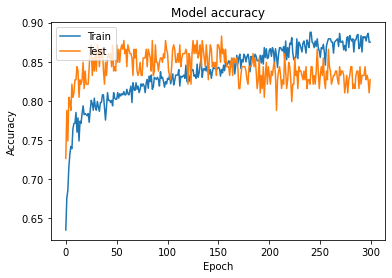

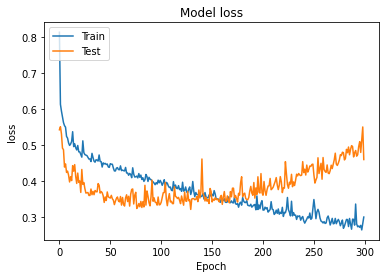

In [250]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.show();

In [ ]:
#son olarak Batch normalizing ve dropout fonksiyonlarını kullanmadan nöron layer ve epoch sayısını arttıracağız.

In [252]:
model=Sequential()
model.add(Dense(243,activation="relu"))
model.add(Dense(243,activation="relu"))
model.add(Dense(243,activation="relu"))
model.add(Dense(243,activation="relu"))
model.add(Dense(243,activation="relu"))
model.add(Dense(243,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
history=model.fit(x,y,validation_split=0.20,epochs=500,batch_size=10,verbose=2 )
model.summary()

Epoch 1/500
72/72 - 1s - loss: 0.6767 - accuracy: 0.6643 - val_loss: 0.5955 - val_accuracy: 0.7207
Epoch 2/500
72/72 - 0s - loss: 0.6270 - accuracy: 0.6699 - val_loss: 0.5646 - val_accuracy: 0.7486
Epoch 3/500
72/72 - 0s - loss: 0.6048 - accuracy: 0.6854 - val_loss: 0.4981 - val_accuracy: 0.7765
Epoch 4/500
72/72 - 0s - loss: 0.5839 - accuracy: 0.6756 - val_loss: 0.5322 - val_accuracy: 0.7318
Epoch 5/500
72/72 - 0s - loss: 0.5667 - accuracy: 0.7542 - val_loss: 0.4423 - val_accuracy: 0.7933
Epoch 6/500
72/72 - 0s - loss: 0.5498 - accuracy: 0.7626 - val_loss: 0.5536 - val_accuracy: 0.7374
Epoch 7/500
72/72 - 0s - loss: 0.5375 - accuracy: 0.7472 - val_loss: 0.4052 - val_accuracy: 0.8156
Epoch 8/500
72/72 - 0s - loss: 0.5107 - accuracy: 0.7711 - val_loss: 0.3953 - val_accuracy: 0.8156
Epoch 9/500
72/72 - 0s - loss: 0.5015 - accuracy: 0.7823 - val_loss: 0.4201 - val_accuracy: 0.8212
Epoch 10/500
72/72 - 0s - loss: 0.5228 - accuracy: 0.7865 - val_loss: 0.4256 - val_accuracy: 0.8268
Epoch 11/

72/72 - 0s - loss: 0.3779 - accuracy: 0.8371 - val_loss: 0.4130 - val_accuracy: 0.8380
Epoch 84/500
72/72 - 0s - loss: 0.3853 - accuracy: 0.8385 - val_loss: 0.4203 - val_accuracy: 0.8380
Epoch 85/500
72/72 - 0s - loss: 0.3894 - accuracy: 0.8315 - val_loss: 0.3483 - val_accuracy: 0.8659
Epoch 86/500
72/72 - 0s - loss: 0.3658 - accuracy: 0.8427 - val_loss: 0.3715 - val_accuracy: 0.8603
Epoch 87/500
72/72 - 0s - loss: 0.3795 - accuracy: 0.8427 - val_loss: 0.3442 - val_accuracy: 0.8715
Epoch 88/500
72/72 - 0s - loss: 0.3593 - accuracy: 0.8483 - val_loss: 0.3587 - val_accuracy: 0.8659
Epoch 89/500
72/72 - 0s - loss: 0.3698 - accuracy: 0.8469 - val_loss: 0.3598 - val_accuracy: 0.8659
Epoch 90/500
72/72 - 0s - loss: 0.3695 - accuracy: 0.8553 - val_loss: 0.3922 - val_accuracy: 0.8659
Epoch 91/500
72/72 - 0s - loss: 0.3649 - accuracy: 0.8497 - val_loss: 0.3643 - val_accuracy: 0.8547
Epoch 92/500
72/72 - 0s - loss: 0.3630 - accuracy: 0.8441 - val_loss: 0.3546 - val_accuracy: 0.8436
Epoch 93/500


Epoch 165/500
72/72 - 0s - loss: 0.2997 - accuracy: 0.8736 - val_loss: 0.6541 - val_accuracy: 0.8212
Epoch 166/500
72/72 - 0s - loss: 0.3110 - accuracy: 0.8708 - val_loss: 0.6448 - val_accuracy: 0.8212
Epoch 167/500
72/72 - 0s - loss: 0.3340 - accuracy: 0.8581 - val_loss: 0.3907 - val_accuracy: 0.8380
Epoch 168/500
72/72 - 0s - loss: 0.3042 - accuracy: 0.8652 - val_loss: 0.5297 - val_accuracy: 0.8324
Epoch 169/500
72/72 - 0s - loss: 0.3290 - accuracy: 0.8624 - val_loss: 0.4408 - val_accuracy: 0.8268
Epoch 170/500
72/72 - 0s - loss: 0.3261 - accuracy: 0.8624 - val_loss: 0.5575 - val_accuracy: 0.7989
Epoch 171/500
72/72 - 0s - loss: 0.3225 - accuracy: 0.8624 - val_loss: 0.5315 - val_accuracy: 0.8436
Epoch 172/500
72/72 - 0s - loss: 0.3160 - accuracy: 0.8596 - val_loss: 0.5718 - val_accuracy: 0.8380
Epoch 173/500
72/72 - 0s - loss: 0.2930 - accuracy: 0.8806 - val_loss: 0.5646 - val_accuracy: 0.8380
Epoch 174/500
72/72 - 0s - loss: 0.2868 - accuracy: 0.8778 - val_loss: 0.7024 - val_accurac

72/72 - 0s - loss: 0.2895 - accuracy: 0.8904 - val_loss: 0.6254 - val_accuracy: 0.8156
Epoch 247/500
72/72 - 0s - loss: 0.2426 - accuracy: 0.8989 - val_loss: 0.7841 - val_accuracy: 0.8268
Epoch 248/500
72/72 - 0s - loss: 0.2468 - accuracy: 0.8933 - val_loss: 0.8830 - val_accuracy: 0.8212
Epoch 249/500
72/72 - 0s - loss: 0.2544 - accuracy: 0.8933 - val_loss: 0.9150 - val_accuracy: 0.8268
Epoch 250/500
72/72 - 0s - loss: 0.2417 - accuracy: 0.9003 - val_loss: 1.0201 - val_accuracy: 0.8101
Epoch 251/500
72/72 - 0s - loss: 0.2340 - accuracy: 0.9045 - val_loss: 1.2282 - val_accuracy: 0.8324
Epoch 252/500
72/72 - 0s - loss: 0.2669 - accuracy: 0.8933 - val_loss: 1.0657 - val_accuracy: 0.7989
Epoch 253/500
72/72 - 0s - loss: 0.3303 - accuracy: 0.8736 - val_loss: 0.9825 - val_accuracy: 0.7989
Epoch 254/500
72/72 - 0s - loss: 0.2986 - accuracy: 0.8722 - val_loss: 0.6831 - val_accuracy: 0.8212
Epoch 255/500
72/72 - 0s - loss: 0.2542 - accuracy: 0.8848 - val_loss: 1.0606 - val_accuracy: 0.7989
Epoc

Epoch 328/500
72/72 - 0s - loss: 0.2251 - accuracy: 0.9087 - val_loss: 1.9004 - val_accuracy: 0.8045
Epoch 329/500
72/72 - 0s - loss: 0.2075 - accuracy: 0.9129 - val_loss: 1.8783 - val_accuracy: 0.8101
Epoch 330/500
72/72 - 0s - loss: 0.2042 - accuracy: 0.9157 - val_loss: 1.7303 - val_accuracy: 0.7989
Epoch 331/500
72/72 - 0s - loss: 0.2305 - accuracy: 0.9087 - val_loss: 1.6923 - val_accuracy: 0.8045
Epoch 332/500
72/72 - 0s - loss: 0.2693 - accuracy: 0.8862 - val_loss: 1.0496 - val_accuracy: 0.8212
Epoch 333/500
72/72 - 0s - loss: 0.2247 - accuracy: 0.9101 - val_loss: 1.6933 - val_accuracy: 0.7989
Epoch 334/500
72/72 - 0s - loss: 0.2329 - accuracy: 0.9045 - val_loss: 1.2176 - val_accuracy: 0.7989
Epoch 335/500
72/72 - 0s - loss: 0.2448 - accuracy: 0.9031 - val_loss: 1.0530 - val_accuracy: 0.7933
Epoch 336/500
72/72 - 0s - loss: 0.2188 - accuracy: 0.9171 - val_loss: 1.1856 - val_accuracy: 0.8045
Epoch 337/500
72/72 - 0s - loss: 0.2210 - accuracy: 0.9031 - val_loss: 1.9234 - val_accurac

72/72 - 0s - loss: 0.2317 - accuracy: 0.9059 - val_loss: 1.0112 - val_accuracy: 0.7877
Epoch 410/500
72/72 - 0s - loss: 0.2135 - accuracy: 0.9115 - val_loss: 1.1924 - val_accuracy: 0.7933
Epoch 411/500
72/72 - 0s - loss: 0.2313 - accuracy: 0.9017 - val_loss: 1.1488 - val_accuracy: 0.7933
Epoch 412/500
72/72 - 0s - loss: 0.2119 - accuracy: 0.9087 - val_loss: 1.2021 - val_accuracy: 0.8156
Epoch 413/500
72/72 - 0s - loss: 0.2254 - accuracy: 0.9073 - val_loss: 1.0116 - val_accuracy: 0.8045
Epoch 414/500
72/72 - 0s - loss: 0.2061 - accuracy: 0.9129 - val_loss: 1.0891 - val_accuracy: 0.8101
Epoch 415/500
72/72 - 0s - loss: 0.2124 - accuracy: 0.9087 - val_loss: 1.4342 - val_accuracy: 0.7654
Epoch 416/500
72/72 - 0s - loss: 0.2334 - accuracy: 0.9017 - val_loss: 1.1251 - val_accuracy: 0.8101
Epoch 417/500
72/72 - 0s - loss: 0.2213 - accuracy: 0.9087 - val_loss: 1.2779 - val_accuracy: 0.8101
Epoch 418/500
72/72 - 0s - loss: 0.2351 - accuracy: 0.9129 - val_loss: 0.8568 - val_accuracy: 0.7933
Epoc

Epoch 491/500
72/72 - 0s - loss: 0.2128 - accuracy: 0.9045 - val_loss: 1.7503 - val_accuracy: 0.7877
Epoch 492/500
72/72 - 0s - loss: 0.2070 - accuracy: 0.9115 - val_loss: 2.1687 - val_accuracy: 0.7933
Epoch 493/500
72/72 - 0s - loss: 0.1985 - accuracy: 0.9185 - val_loss: 1.7191 - val_accuracy: 0.7877
Epoch 494/500
72/72 - 0s - loss: 0.1961 - accuracy: 0.9171 - val_loss: 1.8474 - val_accuracy: 0.7877
Epoch 495/500
72/72 - 0s - loss: 0.2242 - accuracy: 0.9115 - val_loss: 1.3063 - val_accuracy: 0.7877
Epoch 496/500
72/72 - 0s - loss: 0.1941 - accuracy: 0.9213 - val_loss: 1.7566 - val_accuracy: 0.7933
Epoch 497/500
72/72 - 0s - loss: 0.2077 - accuracy: 0.9073 - val_loss: 2.2415 - val_accuracy: 0.7709
Epoch 498/500
72/72 - 0s - loss: 0.2619 - accuracy: 0.8989 - val_loss: 1.1327 - val_accuracy: 0.7821
Epoch 499/500
72/72 - 0s - loss: 0.2838 - accuracy: 0.8919 - val_loss: 0.8077 - val_accuracy: 0.8101
Epoch 500/500
72/72 - 0s - loss: 0.2255 - accuracy: 0.9115 - val_loss: 1.3920 - val_accurac

In [253]:
scores=model.evaluate(x,y)
print('%s:%.2f%%' % (model.metrics_names[1],scores[1]*100))

28/28 [==============================] - 0s 3ms/step - loss: 0.4377 - accuracy: 0.8911
accuracy:89.11%


In [ ]:
##böylelikle her layer nöron ve epoch arttırdığımızda başarı oranımızın artmadığını gördük

In [254]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


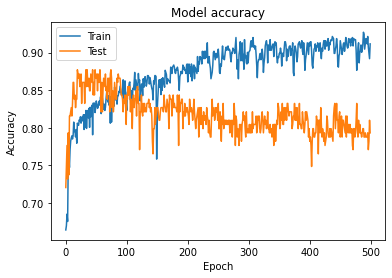

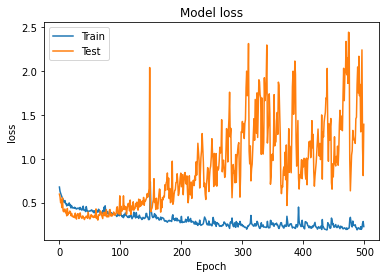

In [255]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.title("Model accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"], loc="upper left")
plt.show()

plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model loss")
plt.xlabel("Epoch")
plt.ylabel("loss")
plt.legend(["Train", "Test"], loc="upper left")
plt.show();